Data visualization Heart disease

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder



In [2]:
df1 = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')

final_data = pd.concat([df1, df2], axis=1)

final_data.to_csv('final_data.csv', index=False)
print('Data saved to final_data.csv')

Data saved to final_data.csv


In [14]:
df = pd.read_csv('final_data.csv')

In [15]:
# fill missing values with KnnImputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [16]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [17]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,49.772943,0.579916,1.476709,127.391213,279.249372,0.021757,0.769456,169.371130,0.097350,1.447922,1.209066,0.073082,1.961367,0.877964,98.239275
std,5.626666,0.216734,0.739473,7.934574,25.470613,0.129175,0.422315,13.869353,0.230261,0.693152,0.327350,0.371018,0.267730,0.258429,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.500000,1.000000,125.000000,273.000000,0.000000,1.000000,158.500000,0.000000,1.200000,1.000000,0.000000,2.000000,1.000000,97.600000
50%,47.500000,0.500000,2.000000,125.000000,289.500000,0.000000,1.000000,179.000000,0.000000,1.750000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,54.500000,0.500000,2.000000,130.000000,295.000000,0.000000,1.000000,179.500000,0.000000,1.750000,1.500000,0.000000,2.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3585 non-null   float64
 1   sex       3585 non-null   float64
 2   cp        3585 non-null   float64
 3   trtbps    3585 non-null   float64
 4   chol      3585 non-null   float64
 5   fbs       3585 non-null   float64
 6   restecg   3585 non-null   float64
 7   thalachh  3585 non-null   float64
 8   exng      3585 non-null   float64
 9   oldpeak   3585 non-null   float64
 10  slp       3585 non-null   float64
 11  caa       3585 non-null   float64
 12  thall     3585 non-null   float64
 13  output    3585 non-null   float64
 14  98.6      3585 non-null   float64
dtypes: float64(15)
memory usage: 420.2 KB


In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

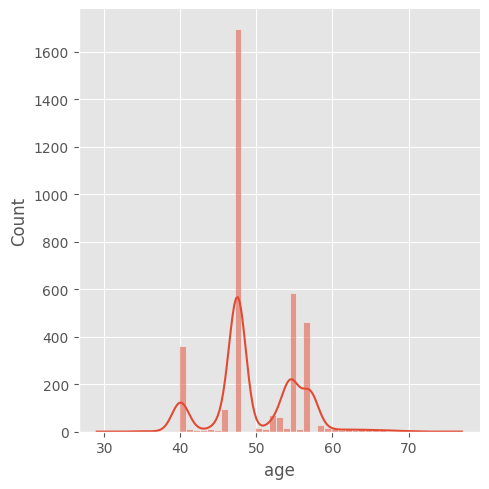

In [45]:
sns.displot(df['age'], kde=True)

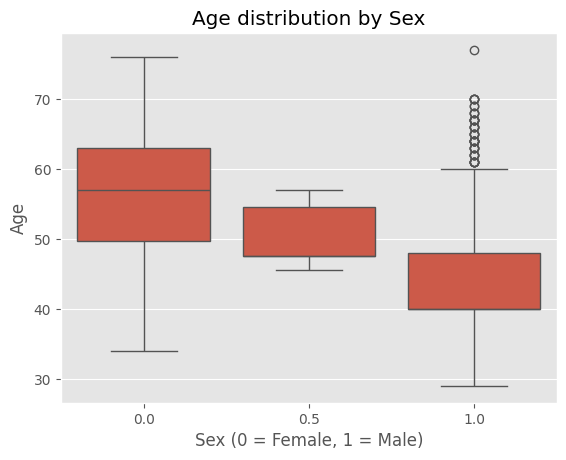

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [25]:
# display sex by age 

sns.boxplot(x='sex', y='age', data=df)
plt.title('Age distribution by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.show()

df.columns

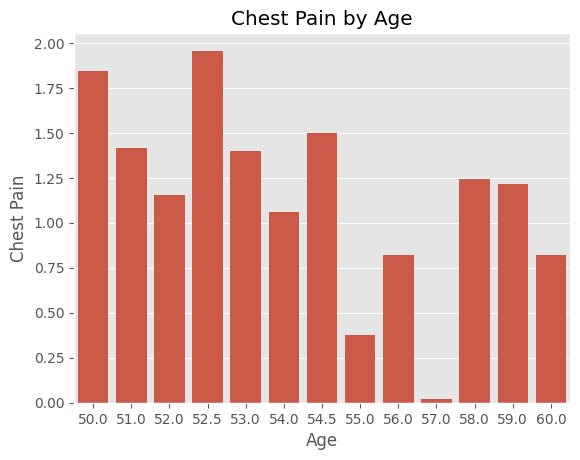

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [51]:
# display cp by age from 50 to 60

mean_chestpain = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['cp'].mean()
sns.barplot(x=mean_chestpain.index, y=mean_chestpain.values)
plt.title('Chest Pain by Age')
plt.xlabel('Age')
plt.ylabel('Chest Pain')
plt.show()


df.columns


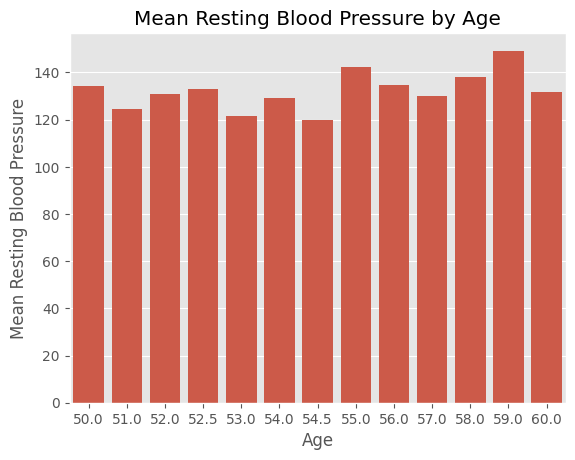

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [42]:
# display mean trtbps by age from 40 to 70  

mean_trtbps = df.groupby('age')['trtbps'].mean().reset_index()
mean_trtbps = mean_trtbps[(mean_trtbps['age'] >= 50) & (mean_trtbps['age'] <= 60)]
sns.barplot(x='age', y='trtbps', data=mean_trtbps)
plt.title('Mean Resting Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Mean Resting Blood Pressure')
plt.show()


df.columns

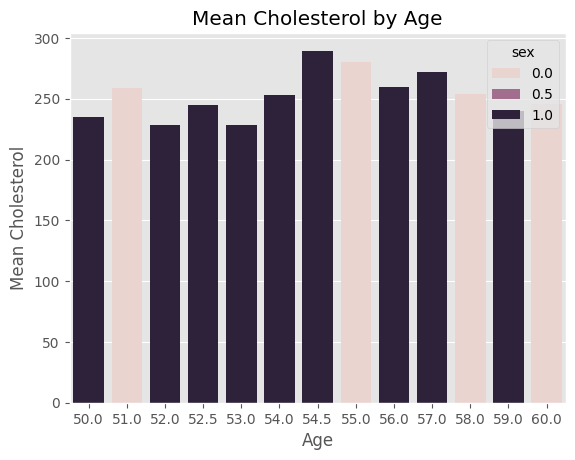

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [54]:
mean_chol = df.groupby('age')['chol'].mean().reset_index()
mean_chol = mean_chol[(mean_chol['age'] >= 50) & (mean_chol['age'] <= 60)]
sns.barplot(x='age', y='chol', hue=df['sex'], data=mean_chol)
plt.title('Mean Cholesterol by Age')
plt.xlabel('Age')
plt.ylabel('Mean Cholesterol')
plt.show()

df.columns



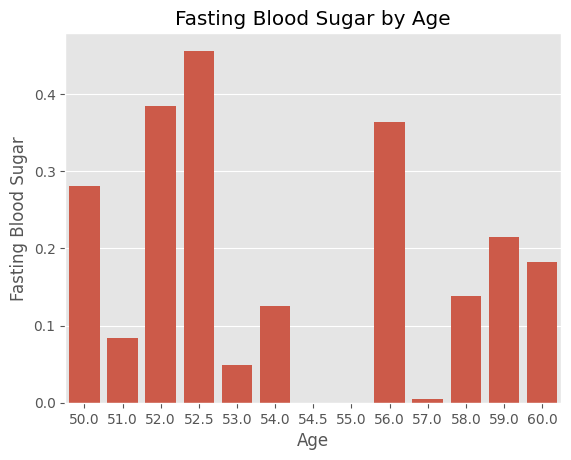

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [57]:
# display fbs by age from 50 to 60

mean_fbs = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['fbs'].mean()
sns.barplot(x=mean_fbs.index, y=mean_fbs.values)
plt.title('Fasting Blood Sugar by Age')
plt.xlabel('Age')
plt.ylabel('Fasting Blood Sugar')
plt.show()

df.columns

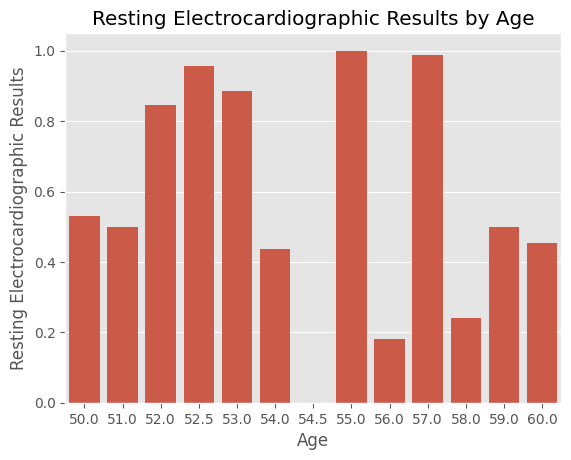

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [59]:
# display restecg by age from 50 to 60  

mean_restecg = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['restecg'].mean()
sns.barplot(x=mean_restecg.index, y=mean_restecg.values)
plt.title('Resting Electrocardiographic Results by Age')
plt.xlabel('Age')
plt.ylabel('Resting Electrocardiographic Results')
plt.show()

df.columns


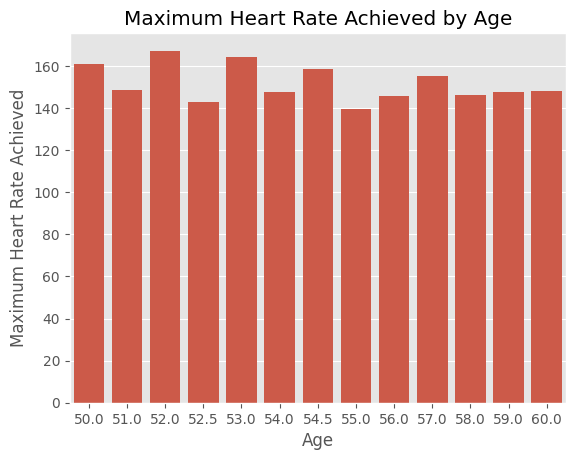

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [60]:
# display thalachh by age from 50 to 60

mean_thalachh = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['thalachh'].mean()
sns.barplot(x=mean_thalachh.index, y=mean_thalachh.values)
plt.title('Maximum Heart Rate Achieved by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

df.columns

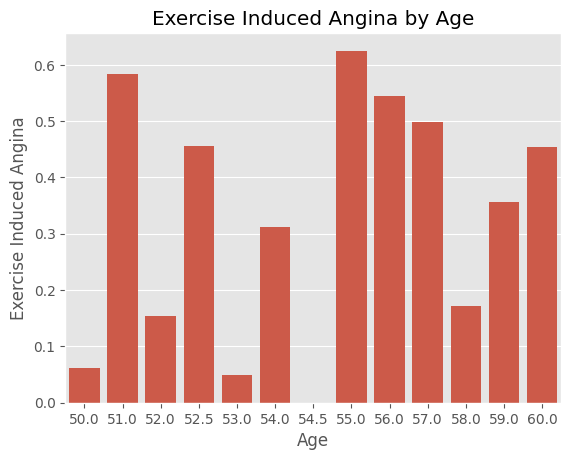

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [61]:
# display exng by age from 50 to 60

mean_exng = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['exng'].mean()
sns.barplot(x=mean_exng.index, y=mean_exng.values)
plt.title('Exercise Induced Angina by Age')
plt.xlabel('Age')
plt.ylabel('Exercise Induced Angina')
plt.show()

df.columns


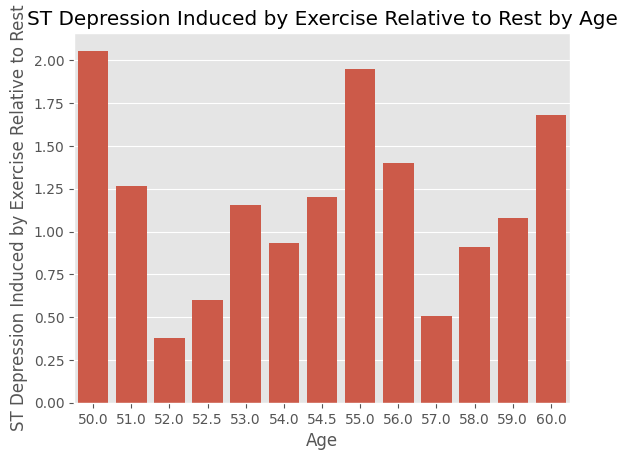

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [62]:
# display oldpeak by age from 50 to 60

mean_oldpeak = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['oldpeak'].mean()
sns.barplot(x=mean_oldpeak.index, y=mean_oldpeak.values)
plt.title('ST Depression Induced by Exercise Relative to Rest by Age')
plt.xlabel('Age')
plt.ylabel('ST Depression Induced by Exercise Relative to Rest')
plt.show()

df.columns


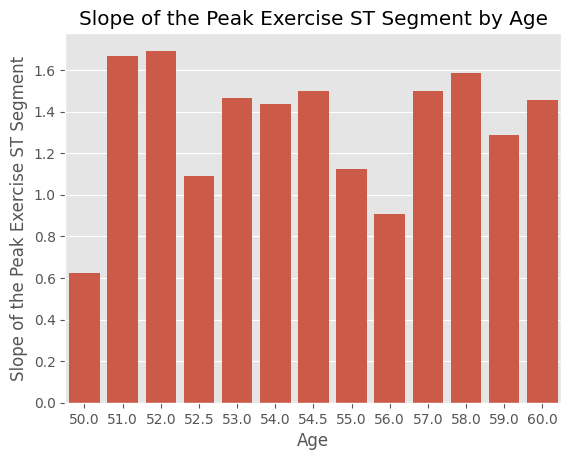

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [63]:
# display slp by age from 50 to 60

mean_slp = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['slp'].mean()
sns.barplot(x=mean_slp.index, y=mean_slp.values)
plt.title('Slope of the Peak Exercise ST Segment by Age')
plt.xlabel('Age')
plt.ylabel('Slope of the Peak Exercise ST Segment')
plt.show()

df.columns

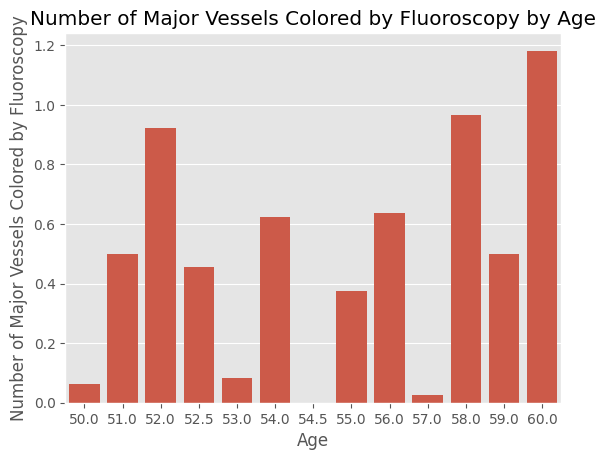

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [64]:
# display caa by age from 50 to 60

mean_caa = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['caa'].mean()
sns.barplot(x=mean_caa.index, y=mean_caa.values)
plt.title('Number of Major Vessels Colored by Fluoroscopy by Age')
plt.xlabel('Age')
plt.ylabel('Number of Major Vessels Colored by Fluoroscopy')
plt.show()

df.columns


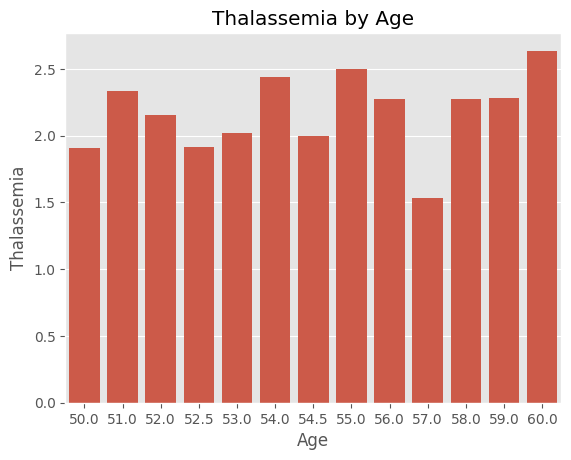

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [65]:
# display thall by age from 50 to 60

mean_thall = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['thall'].mean()
sns.barplot(x=mean_thall.index, y=mean_thall.values)
plt.title('Thalassemia by Age')
plt.xlabel('Age')
plt.ylabel('Thalassemia')
plt.show()

df.columns

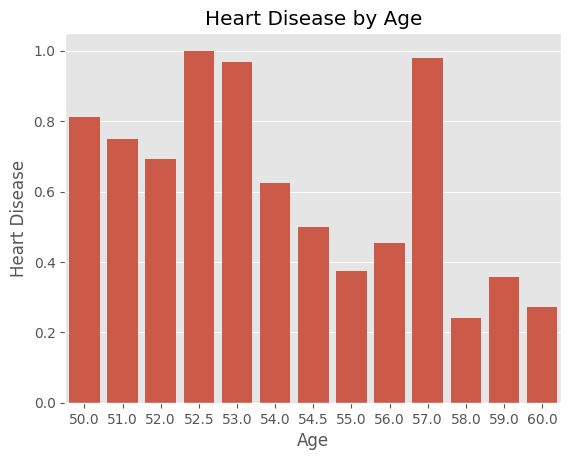

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [66]:
# display output by age from 50 to 60

mean_output = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['output'].mean()
sns.barplot(x=mean_output.index, y=mean_output.values)
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

df.columns

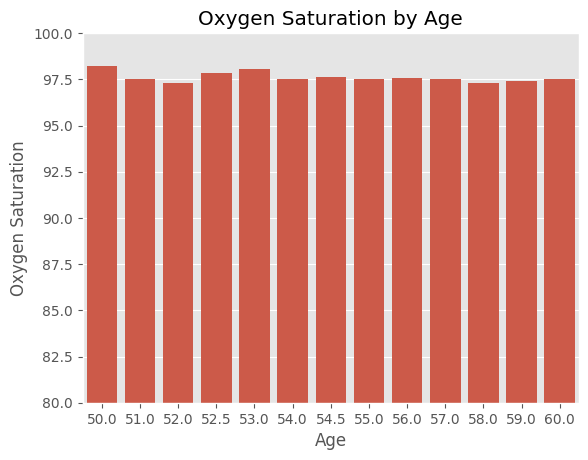

In [70]:
# display o2Saturation by age from 50 to 60


mean_o2Saturation = df[(df['age'] >= 50) & (df['age'] <= 60)].groupby('age')['98.6'].mean()

# Create the bar plot
sns.barplot(x=mean_o2Saturation.index, y=mean_o2Saturation.values)

# Add title and labels
plt.title('Oxygen Saturation by Age')
plt.xlabel('Age')
plt.ylabel('Oxygen Saturation')

# Set x-axis limits to be visible between 80 and 100
plt.ylim(80, 100)

# Show the plot
plt.show()



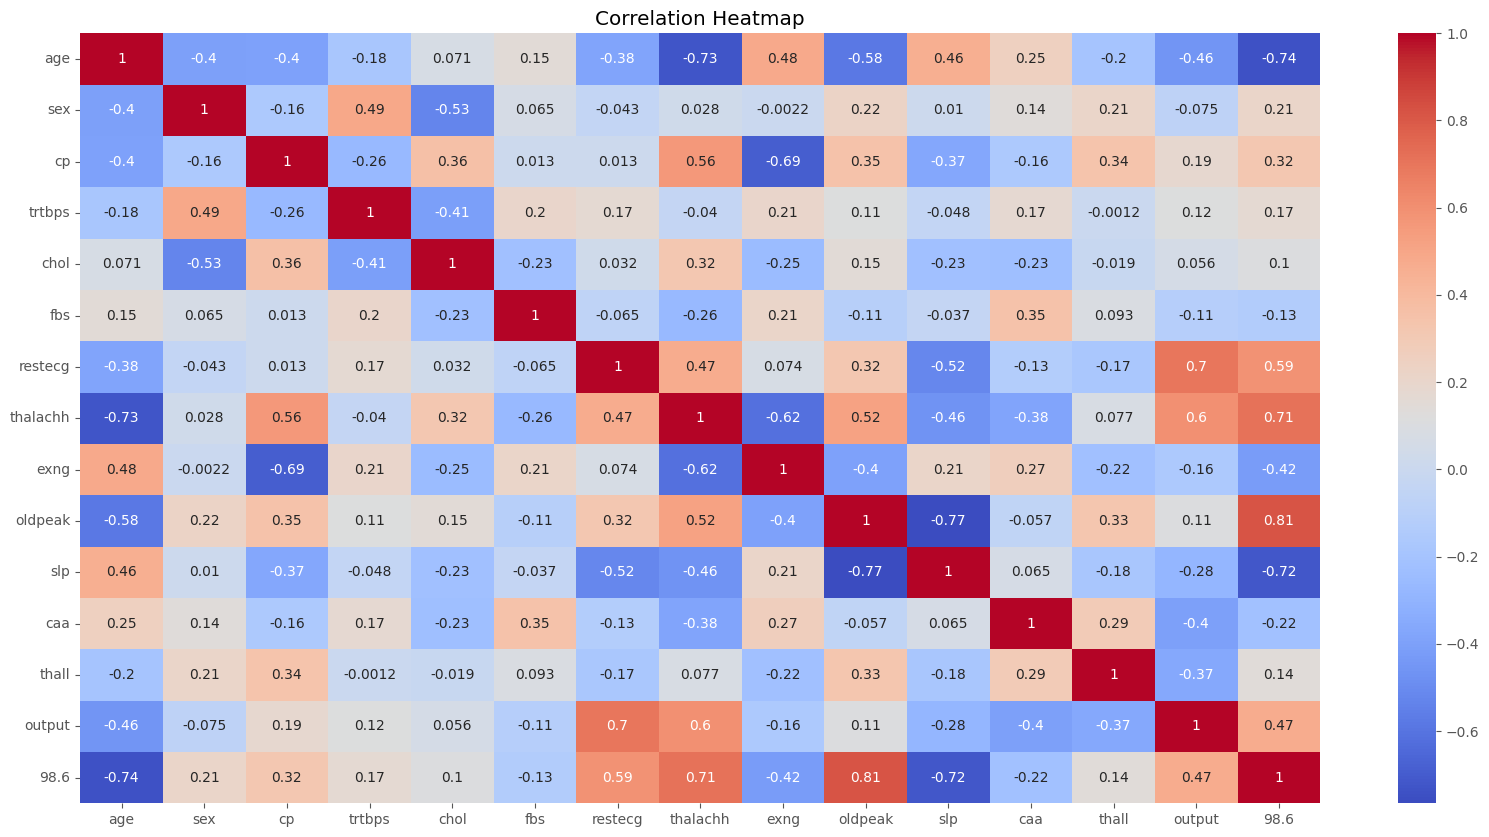

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [74]:
# display heatmap of the data

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

df.columns





In [75]:
# display the most correlated features to the output key

corr = df.corr()

corr_output = corr['output'].sort_values(ascending=False)
corr_output = corr_output[1:]
corr_output


restecg     0.702124
thalachh    0.595276
98.6        0.473784
cp          0.185514
trtbps      0.115886
oldpeak     0.109253
chol        0.056434
sex        -0.074905
fbs        -0.114768
exng       -0.162514
slp        -0.284582
thall      -0.365570
caa        -0.404570
age        -0.456078
Name: output, dtype: float64